# Project: Youth Suicide in Canada

## What factors may contribute?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Gapminder World (<a href="http://www.gapminder.org/">link</a>) provides a number of datasets about how people live their lives in different countries, tracked across years, and for a number of different indicators.

As a resident of Canada, I wanted to investigate what factors may contribute to suicide among Canadian youth. Gapminder provides suicide rates for youth ages 0-14.

I examined additional datasets to see if there was any correlation to suicide rates:

<ul>
<li>Sugar consumption</li>
<li>Government and civil society aid</li>
<li>Electricity use</li>
</ul>

These data sets, like the suicide rates data set, have several decades of data available for Canada.

Specifically, I wondered:

<ol>
<li>Does increased sugar consumption increase suicide rates?</li>
<li>Does increased government and civil society aid decrease suicide rates?</li>
<li>Is there a correlation between consumption of electricy and suicide rates?</li>
<li>Why has the suicide rate dipped since its peak in the 1990s?</li>
</ol>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


Each Gapminder dataset can be downloaded as an Excel file. The Excel file typically has a number of sheets, one of which contains the actual data. For each, I exported the Excel file as CSV and renamed the data sheet to indicate what data it contained. Now each can be loaded into its own dataframe.

In [32]:
# suicides age 0-14 (Canada) is the control variable
df_control = pd.read_csv('source_data/csv/suicides0-14.csv')

# these are the data sets we'll examine to see if they are correlated w/ the suicide rates

# Sugar per person (g per day)
df_sugar = pd.read_csv('source_data/csv/sugar_consumption.csv')

# Government and civil society aid (% of total aid)
df_aid = pd.read_csv('source_data/csv/aid.csv')

# Electricity consumption, per capita (kWh)
df_elec = pd.read_csv('source_data/csv/electricity_consumption.csv')

### Data Cleaning

The format of the Gapminder data was consistent across data sets. Countries were represented as rows, and years as columns. Because I was concentrating on Canada, I wanted to extract the Canada row, then transpose the dataframe in order to have the years as the rows. That way, when the dataframes were combined, I could have the different datasets as the columns.

#### Column Renaming

The datasets do not label the country column with "country," but rather the name of the dataset. In order to make it easier to extract the Canada data, I renamed the column to "country" in all the datasets. Here is an example of the suicide data prior to the rename:

In [33]:
df_control.head(5)

,Suicide 0-14 all age adj,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402384,0.379721,0.512450,0.576616,0.594624,0.648458,0.695720,0.617807,0.751746,NaN
1,Australia,0.282023,0.1629,0.0,0.100662,0.142596,0.044587,0.168712,0.116169,0.108778,...,0.397298,0.221465,0.194630,0.192489,0.333794,0.188775,NaN,0.164442,NaN,NaN
2,Austria,NaN,NaN,NaN,NaN,NaN,0.301751,0.255933,0.460640,0.461944,...,0.211056,0.558918,0.138358,0.273217,0.203178,0.134750,0.270398,0.068317,0.138712,0.283946
3,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.035547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.570722,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# replace spaces with underscores and make lowercase to ease column renaming
df_control.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_sugar.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_aid.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_elec.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [35]:
# rename country column in place so we can easily pull out the Canadian data
df_control.rename(columns={'suicide_0-14_all_age_adj': 'country'}, inplace=True)
df_sugar.rename(columns={'unnamed:_0': 'country'}, inplace=True)
df_aid.rename(columns={'government_and_civil_society_aid_(%_of_total_aid)': 'country'}, inplace=True)
df_elec.rename(columns={'electricity_consumption,_per_capita_(kwh)': 'country'}, inplace=True)

Here is the same data after the column rename:

In [36]:
df_control.head(5)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402384,0.379721,0.512450,0.576616,0.594624,0.648458,0.695720,0.617807,0.751746,NaN
1,Australia,0.282023,0.1629,0.0,0.100662,0.142596,0.044587,0.168712,0.116169,0.108778,...,0.397298,0.221465,0.194630,0.192489,0.333794,0.188775,NaN,0.164442,NaN,NaN
2,Austria,NaN,NaN,NaN,NaN,NaN,0.301751,0.255933,0.460640,0.461944,...,0.211056,0.558918,0.138358,0.273217,0.203178,0.134750,0.270398,0.068317,0.138712,0.283946
3,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.035547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.570722,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Extracting the Canada Data

Next, for each dataset, I extracted the row for the Canada data into new dataframes.

In [37]:
# pull out just the Canada data for each dataset
df_control_can = df_control.loc[df_control['country'] == 'Canada']
df_sugar_can = df_sugar.loc[df_sugar['country'] == 'Canada']
df_aid_can= df_aid.loc[df_aid['country'] == 'Canada']
df_elec_can = df_elec.loc[df_elec['country'] == 'Canada']

Here is the suicide data for Canada:

In [38]:
df_control_can.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
10,Canada,0.088225,0.029249,0.111919,0.134195,0.102295,0.04865,0.137556,0.043363,0.226682,...,0.519018,0.737723,0.427206,0.546789,0.418587,0.434031,NaN,NaN,NaN,NaN


#### Combining the Data into a Single Dataframe

In order to show a single chart with all the data, I needed to merge all the data into a single dataframe. I wanted the years as rows and the data as columns. In order to do this, I needed to tranform each dataframe and ensure the column for "country" was removed so it did not become a row.

In [39]:
# drop country column from each dataset. we're going to turn these columns into rows
# and we don't want a row for country.

# hide warnings. c.f. https://stackoverflow.com/a/20627316/3199246
pd.options.mode.chained_assignment = None  # default='warn'

cols = [0]

df_control_can.drop(df_control_can.columns[cols], axis=1, inplace=True)
df_sugar_can.drop(df_sugar_can.columns[cols], axis=1, inplace=True)
df_aid_can.drop(df_aid_can.columns[cols], axis=1, inplace=True)
df_elec_can.drop(df_elec_can.columns[cols], axis=1, inplace=True)

In [40]:
# transpose each dataframe, we want 1 year / row
df_control_can = df_control_can.T
df_sugar_can = df_sugar_can.T
df_aid_can = df_aid_can.T
df_elec_can = df_elec_can.T

The suicide data for Canada now looks like this:

In [41]:
df_control_can.head()

,10
1950,0.088225
1951,0.029249
1952,0.111919
1953,0.134195
1954,0.102295


In [42]:
df_control_can.tail()

,10
2004,0.434031
2005,NaN
2006,NaN
2007,NaN
2008,NaN


As the next step prior to merging, I wanted to ensure the columns had descriptive names for the data. The years are still an index; I changed those to columns so the merge had common data to merge on. Also, as shown above, some of the data was missing, so I removed those rows before merging.

In [43]:
# rename the columns
df_control_can.index.name = 'year'
df_control_can.columns = ['suicides']

df_sugar_can.index.name = 'year'
df_sugar_can.columns = ['sugar']

df_aid_can.index.name = 'year'
df_aid_can.columns = ['aid']

df_elec_can.index.name = 'year'
df_elec_can.columns = ['electricity']

In [44]:
# drop if any value in the row has a nan
df_control_can.dropna(how='any', inplace = True);
df_sugar_can.dropna(how='any', inplace = True);
df_aid_can.dropna(how='any', inplace = True);
df_elec_can.dropna(how='any', inplace = True);

In [45]:
# for merging ease, make the year a column
df_control_can.reset_index(inplace = True)
df_sugar_can.reset_index(inplace = True)
df_aid_can.reset_index(inplace = True)
df_elec_can.reset_index(inplace = True)

The suicide data now looks like this:

In [46]:
df_control_can.head()

,year,suicides
0,1950,0.088225
1,1951,0.029249
2,1952,0.111919
3,1953,0.134195
4,1954,0.102295


In [47]:
df_control_can.tail()

,year,suicides
50,2000,0.737723
51,2001,0.427206
52,2002,0.546789
53,2003,0.418587
54,2004,0.434031


The final step for this section was to merge into a single dataframe.

In [48]:
# merge all data into a new dataframe
df = pd.merge(df_control_can, df_sugar_can)
df = pd.merge(df, df_aid_can)
df = pd.merge(df, df_elec_can)

In [49]:
df.head()

,year,suicides,sugar,aid,electricity
0,1972,0.325459,131.51,3.784353,9903.776327
1,1973,0.339213,128.77,0.654057,10297.948209
2,1975,0.362898,120.55,2.117721,10436.942565
3,1976,0.306694,128.77,7.336720,11043.838762
4,1977,0.498363,126.03,3.749176,11762.481089


<a id='eda'></a>
## Exploratory Data Analysis

First, let's chart each dataset by itself.

### Suicides children 0-14, Canada

The interesting thing in this chart, after a steady rise for 40 years, is the notable decrease after its peak in the 1990s.

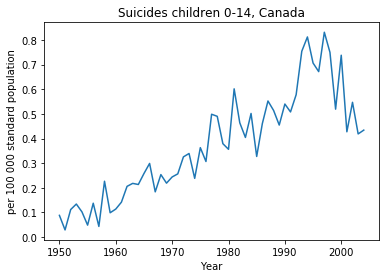

In [50]:
plt.plot(df_control_can['year'], df_control_can['suicides'])

plt.xlabel('Year')
plt.ylabel('per 100 000 standard population')
plt.title('Suicides children 0-14, Canada')

plt.show()

### Sugar consumption per person, Canada

There is clearly a large increase since the 1990s, following a decrease since the 1960s.

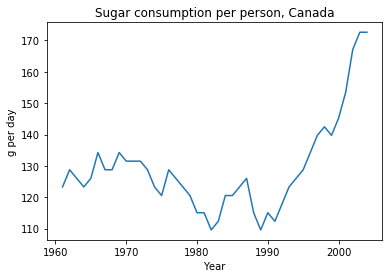

In [25]:
plt.plot(df_sugar_can['year'], df_sugar_can['sugar'])

plt.title('Sugar consumption per person, Canada')
plt.xlabel('Year')
plt.ylabel('g per day')

plt.show()

### Government and civil society aid, Canada

After years of relatively flat data, this aid increased greatly since the 1990s.

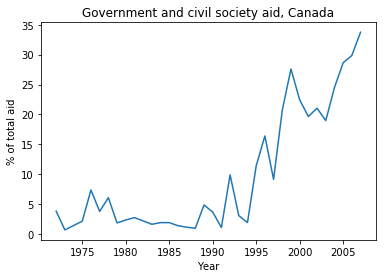

In [26]:
plt.plot(df_aid_can['year'], df_aid_can['aid'])

plt.title('Government and civil society aid, Canada')
plt.xlabel('Year')
plt.ylabel('% of total aid')

plt.show()

### Electricity consumption, Canada

It's no surprise that electricity consumption continues a general trend of increasing; I began to wonder if there was a correlation with youth suidice.

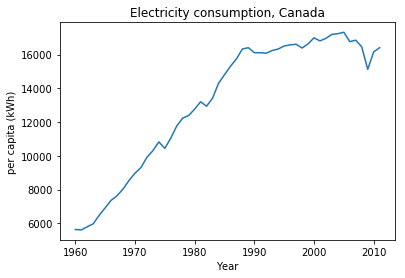

In [28]:
plt.plot(df_elec_can['year'], df_elec_can['electricity'])

plt.title('Electricity consumption, Canada')
plt.xlabel('Year')
plt.ylabel('per capita (kWh)')

plt.show()

### All the datasets in one chart

All the data show a general increase over the years, some with a more pronounced increase since the 1990s. In putting the data on one chart and adjusting the y-values to its own scale for each dataset, I wanted to see if any of the trends mapped closely with suicides.

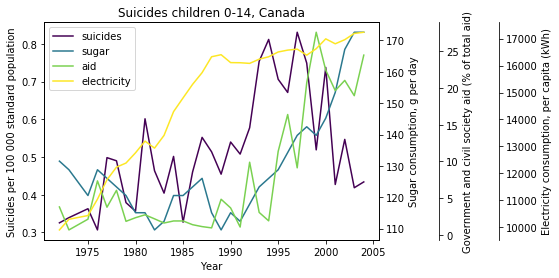

In [29]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

host.set_title('Suicides children 0-14, Canada')

host.set_xlabel('Year')
host.set_ylabel('Suicides per 100 000 standard population')

par1.set_ylabel('Sugar consumption, g per day')
par2.set_ylabel('Government and civil society aid (% of total aid)')
par3.set_ylabel('Electricity consumption, per capita (kWh)')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.4)
color3 = plt.cm.viridis(0.8)
color4 = plt.cm.viridis(1.2)

p1, = host.plot(df['year'], df['suicides'], color=color1, label="suicides")
p2, = par1.plot(df['year'], df['sugar'], color=color2, label="sugar")
p3, = par2.plot(df['year'], df['aid'], color=color3, label="aid")
p4, = par3.plot(df['year'], df['electricity'], color=color4, label="electricity")

lns = [p1, p2, p3, p4]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
par3.spines['right'].set_position(('outward', 120))

plt.show()

### Does increased sugar consumption increase suicide rates?

By examining the chart below, no, there does not appear to be a correlation between suicide rates and sugar consumption. Since the turn of the 21st century, suicide rates have decreased while sugar consumption has increased.

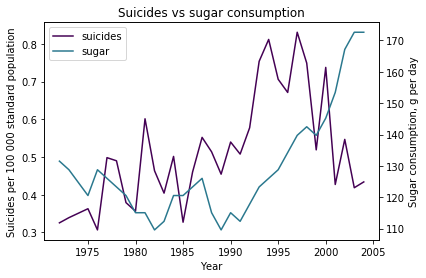

In [54]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_title('Suicides vs sugar consumption')

host.set_xlabel('Year')
host.set_ylabel('Suicides per 100 000 standard population')

par1.set_ylabel('Sugar consumption, g per day')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.4)
color3 = plt.cm.viridis(0.8)
color4 = plt.cm.viridis(1.2)

p1, = host.plot(df['year'], df['suicides'], color=color1, label="suicides")
p2, = par1.plot(df['year'], df['sugar'], color=color2, label="sugar")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

plt.show()

### Does increased government and civil society aid decrease suicide rates?

The data for aid appears to be more closely correlated than that for sugar consumption, but, again, the decrease in suicides as of late does not match the trend for the uptick in aid. Further, through the 1980s, the trend for suicides was still increasing while the aid was flatlining.

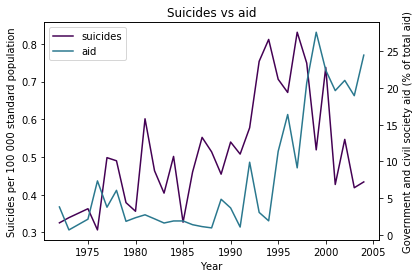

In [53]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_title('Suicides vs aid')

host.set_xlabel('Year')
host.set_ylabel('Suicides per 100 000 standard population')

par1.set_ylabel('Government and civil society aid (% of total aid)')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.4)

p1, = host.plot(df['year'], df['suicides'], color=color1, label="suicides")
p2, = par1.plot(df['year'], df['aid'], color=color2, label="aid")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

plt.show()

### Is there a correlation between consumption of electricy and suicide rates?

This data shows no correlation.

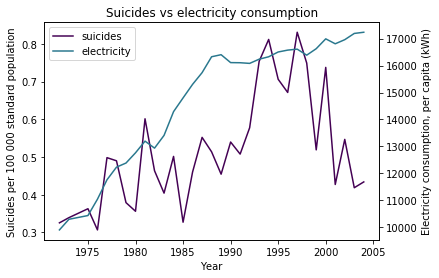

In [55]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_title('Suicides vs electricity consumption')

host.set_xlabel('Year')
host.set_ylabel('Suicides per 100 000 standard population')

par1.set_ylabel('Electricity consumption, per capita (kWh)')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.4)

p1, = host.plot(df['year'], df['suicides'], color=color1, label="suicides")
p2, = par1.plot(df['year'], df['electricity'], color=color2, label="electricity")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

plt.show()

### Why has the suicide rate dipped since its peak in the 1990s?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!